<a href="https://colab.research.google.com/github/u1353279/DATA_PHD/blob/main/Leicester_Degdredation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (9, 9)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Degredation Analysis for leicester PV-01

In [3]:
leicester_1 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Leicester1.csv')

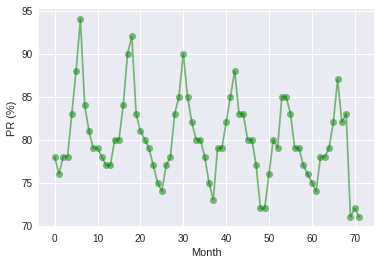

In [4]:
fig, axs = plt.subplots()
axs.plot(bedford_1.index, leicester_1.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(leicester_1.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [5]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [6]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     561.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.66e-31
Time:                        18:37:55   Log-Likelihood:                -17.174
No. Observations:                  60   AIC:                             38.35
Df Residuals:                      58   BIC:                             42.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.2774      0.096    852.773      0.000      82.084      82.471
x1            -0.0579      0.002    -23.685      0.000      -0.063      -0.053
==============================================================================
Omnibus:                        6.258   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.295
Skew:                          -0.504   Prob(JB):                        0.117
Kurtosis:                       2.163   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, tehrefore does have a relationship with the target.

In [7]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.69

In [8]:
results.params

array([ 8.22774293e+01, -5.78540335e-02])

In [9]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.84

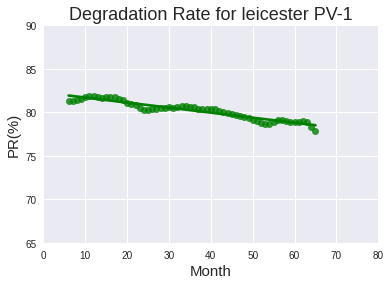

In [10]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = leicester_1, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for leicester PV-1",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for leicester PV-1 range -0.69 & -0.84%

# Degredation Analysis for leicester PV-02

In [12]:
leicester_2 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Leicester2.csv')

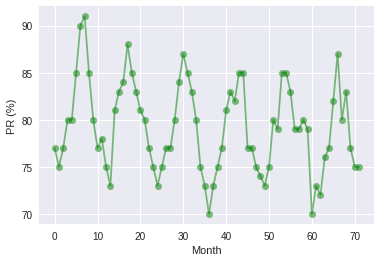

In [13]:
fig, axs = plt.subplots()
axs.plot(leicester_2.index, leicester_2.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(leicester_2.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [14]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [15]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     146.8
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.58e-17
Time:                        18:42:04   Log-Likelihood:                -55.272
No. Observations:                  60   AIC:                             114.5
Df Residuals:                      58   BIC:                             118.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.2187      0.182    446.118      0.000      80.854      81.583
x1            -0.0558      0.005    -12.117      0.000      -0.065      -0.047
==============================================================================
Omnibus:                        2.549   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.496
Skew:                           0.022   Prob(JB):                        0.473
Kurtosis:                       2.228   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [16]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.67

In [17]:
results.params

array([ 8.12187452e+01, -5.58488469e-02])

In [18]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.83

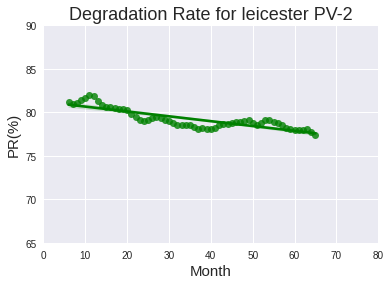

In [19]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = leicester_2, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for leicester PV-2",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for leicester PV-2 range -0.67 & -0.83%

# Degredation Analysis for leicester PV-03

In [21]:
leicester_3 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Leicester3.csv')

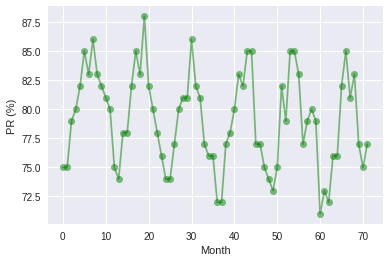

In [23]:
fig, axs = plt.subplots()
axs.plot(leicester_3.index, leicester_3.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(leicester_3.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [24]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [25]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           6.69e-18
Time:                        18:45:11   Log-Likelihood:                -42.879
No. Observations:                  60   AIC:                             89.76
Df Residuals:                      58   BIC:                             93.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7590      0.148    545.362      0.000      80.463      81.055
x1            -0.0464      0.004    -12.366      0.000      -0.054      -0.039
==============================================================================
Omnibus:                        3.478   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.521
Skew:                          -0.342   Prob(JB):                        0.284
Kurtosis:                       2.265   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [26]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.56

In [27]:
results.params

array([ 8.07590191e+01, -4.63612578e-02])

In [28]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.69

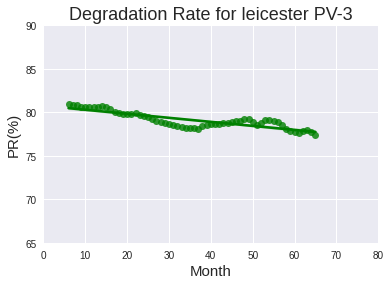

In [29]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = leicester_3, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for leicester PV-3",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Bedford PV-3 range -0.56 & -0.69%